# <font color=purple> Machine Learning

<font color=purple> **The objective of this project is twofold: to delve into the study of machine learning libraries while advancing further in the exploration of Jupyter Notebook and Python. The project encompasses a many dataset and offers a range of exercises involving those datasets.** <font>

Several practices will be employed in this study:

1- Below certain commands, there will be a summary of their meanings.

2- All text will be written in English.

3- The data has been extracted from exercises on the Alura platform.

4- Each dataset will have a summary of its meaning.

# About

The **first** project, we will work with the example of classifying animals between pigs and dogs. Using the Python language, we will create a variable for each animal, containing an array of values, that is, the features. We will have three characteristics: short or long fur, whether the legs are short or long, and whether the animal emits the sound "woof" or not. For each of the features: **1= yes and 0= no.**

Features: Fur size - Legs size - Sound.

The **second** dataset contains information about a website, detailing which features the clients clicked on. It includes the following columns: 'home', 'how_it_works', 'contact', and 'bought', each corresponding to the feature clicked by the client.

The **third** dataset represents different website projects, such as a school's website, a bakery's website, and so on. People interested in creating websites for their respective businesses submit the project to a company and specify the number of hours for the project to be completed (expected_hours), as well as the amount to be paid (price). There is also a column "unfinished" to check if the work is done or not. The use of ML here is to predict if the corresponding hours and payment will let to a finished job.

The **fourth** dataset is a fictional database where each row represents a car for sale on an online store. The cars are from various different owners, and some of these cars have been sold while others have not. The "sold" column represents whether the cars have been sold or not: "yes" for sold cars and "no" for unsold ones. We have three features for each of the cars: firstly, "mileage per year" represents how many miles the car has traveled per year; "model year" represents the year of each model (which is different from the year of manufacture); and finally, we have the "price," i.e., the selling price of each car.

In [1]:
# !pip install graphviz

In [2]:
# Imports

import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
import graphviz

# SKLearn imports

from sklearn.svm import LinearSVC
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.dummy import DummyClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz

# Warnings

import warnings
warnings.filterwarnings("ignore")


# datasets

url_1 = 'https://gist.githubusercontent.com/guilhermesilveira/2d2efa37d66b6c84a722ea627a897ced/raw/10968b997d885cbded1c92938c7a9912ba41c615/tracking.csv'
url_2 = 'https://gist.githubusercontent.com/guilhermesilveira/1b7d5475863c15f484ac495bd70975cf/raw/16aff7a0aee67e7c100a2a48b676a2d2d142f646/projects.csv'
url_3 = 'https://gist.githubusercontent.com/guilhermesilveira/4d1d4a16ccbf6ea4e0a64a38a24ec884/raw/afd05cb0c796d18f3f5a6537053ded308ba94bf7/car-prices.csv'

# Readers

data_1 = pd.read_csv(url_1, sep=',')
data_2 = pd.read_csv(url_2, sep=',')
data_3 = pd.read_csv(url_3, sep=',')



# First Dataset

In [3]:
# Pigs

pig_01 = [0, 1, 0]
pig_02 = [0, 1, 1]
pig_03 = [1, 1, 0]

# Dogs

dog_01 = [0, 1, 1]
dog_02 = [1, 0, 1]
dog_03 = [1, 1, 1]

train_x = [pig_01, pig_02, pig_03, dog_01, dog_02, dog_03]

# Defining which class the subject is - 1 for pigs, 0 for dogs
train_y = [1,1,1,0,0,0]

model_01 = LinearSVC()
model_01.fit(train_x, train_y)

LinearSVC()

In [4]:
# Creating a new animal

new_animal = [1,1,1]
model_01.predict([new_animal])

array([0])

In [5]:
# Creating test model

new_animal_01 = [1,1,1]
new_animal_02 = [1,1,0]
new_animal_03 = [0,1,1]

test_x = [new_animal_01, new_animal_02, new_animal_03]
test_y = [0,1,1]

predictions = model_01.predict(test_x)

In [6]:
# Comparing the predicted model_01 to the right answers and checking the accuracy rate of our model

right_comparation = (predictions == test_y).sum()
total = len(test_x)
accuracy_rate = right_comparation/ total

print(f'The accuracy rate is:  {(accuracy_rate * 100).round(2)} %')

The accuracy rate is:  66.67 %


In [7]:
# Using the SKLearn library

accuracy_rate = accuracy_score(test_y, predictions)
print(f'The accuracy rate is:  {(accuracy_rate * 100).round(2)} %')

The accuracy rate is:  66.67 %


# Second Dataset

In [8]:
# Selecting first 3 columns

x = data_1[['home','how_it_works','contact']]
y = data_1['bought']
print(y)

0     0
1     0
2     0
3     0
4     0
     ..
94    0
95    1
96    0
97    0
98    0
Name: bought, Length: 99, dtype: int64


In [9]:
# Creating test and train data

train_x = x[:75]
train_y = y[:75]
test_x = x[75:]
test_y = y[75:]

print(f'Training with: {len(train_x)} elements and Testing with: {len(test_x)} elements')

Training with: 75 elements and Testing with: 24 elements


In [10]:
# Creating model

model = LinearSVC()
model.fit(train_x, train_y)
prediction = model.predict(test_x)

accuracy = accuracy_score(test_y, prediction)

print(f'Accuracy: {accuracy.round(4) * 100} %')

Accuracy: 95.83 %


In [11]:
# Doing the same process utilizing SKLearn method train_test_split

SEED = 20

train_x, test_x, train_y, test_y = train_test_split(x,y, test_size = 0.25, random_state = SEED)
print(f'Training with: {len(train_x)} elements and Testing with: {len(test_x)} elements')

model = LinearSVC()
model.fit(train_x, train_y)
prediction = model.predict(test_x)

accuracy = accuracy_score(test_y, prediction)

print(f'Accuracy: {accuracy.round(4) * 100} %')

Training with: 74 elements and Testing with: 25 elements
Accuracy: 96.0 %


In [12]:
# Checking proportions between elements

print(train_y.value_counts(), test_y.value_counts())

bought
0    47
1    27
Name: count, dtype: int64 bought
0    19
1     6
Name: count, dtype: int64


In [13]:
# The last test was not done with correct proportions, let's adjust it using stratify.

SEED = 20

train_x, test_x, train_y, test_y = train_test_split(x,y, test_size = 0.25, random_state = SEED, stratify=y)
print(f'Training with: {len(train_x)} elements and Testing with: {len(test_x)} elements')

model = LinearSVC()
model.fit(train_x, train_y)
prediction = model.predict(test_x)

accuracy = accuracy_score(test_y, prediction)

print(f'Accuracy: {accuracy.round(4) * 100} %')
print(train_y.value_counts(), test_y.value_counts())

Training with: 74 elements and Testing with: 25 elements
Accuracy: 96.0 %
bought
0    49
1    25
Name: count, dtype: int64 bought
0    17
1     8
Name: count, dtype: int64


# Third Dataset

In [14]:
# Checking the dataset

data_2.head()

,unfinished,expected_hours,price
0,1,26,192
1,1,88,9015
2,1,89,2577
3,1,42,275
4,1,39,170


In [15]:
# Creating the column "Finished" to avoid missunderstandings in the future by using "unfinished"

change = {
    1:0,
    0:1
}

data_2['finished'] = data_2['unfinished'].map(change)

<Axes: xlabel='expected_hours', ylabel='price'>

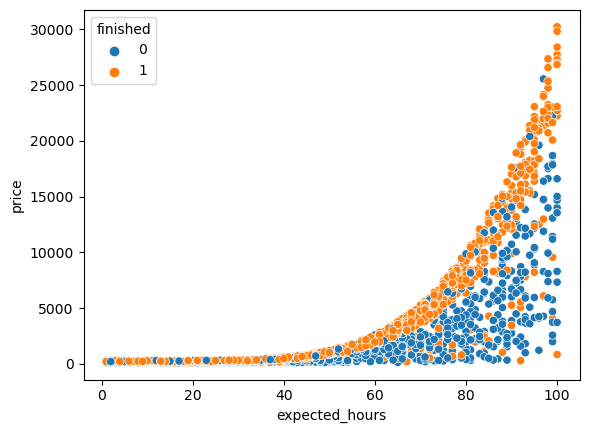

In [16]:
# Checking information using seaborn

sns.scatterplot(x='expected_hours', y='price', data=data_2, hue='finished')

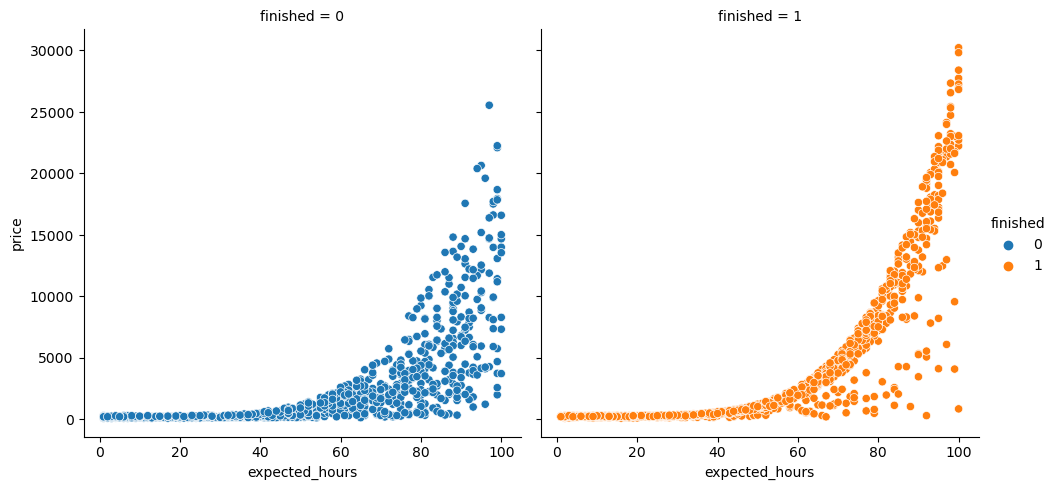

In [17]:
# Comparing informations if finished or not

sns.relplot(x='expected_hours', y='price', data=data_2, col='finished', hue='finished')

In [18]:
# Reviewing the accuracy of the test

x = data_2[['expected_hours','price']]
y = data_2['finished']

SEED = 5
np.random.seed(SEED)

train_x, test_x, train_y, test_y = train_test_split(x,y, test_size = 0.25, stratify=y)
print(f'Training with: {len(train_x)} elements and Testing with: {len(test_x)} elements')

model = LinearSVC()
model.fit(train_x, train_y)
prediction = model.predict(test_x)

accuracy = accuracy_score(test_y, prediction)

print(f'Accuracy: {accuracy.round(3) * 100} %')
print(train_y.value_counts(), test_y.value_counts())

Training with: 1617 elements and Testing with: 540 elements
Accuracy: 49.3 %
finished
1    850
0    767
Name: count, dtype: int64 finished
1    284
0    256
Name: count, dtype: int64


In [19]:
# Creating a baseline accuracy to be beaten

base_prediction = np.ones(540)
accuracy = accuracy_score(test_y, base_prediction)
print(f'Baseline accuracy: {accuracy.round(3) * 100} %')

Baseline accuracy: 52.6 %


<Axes: xlabel='expected_hours', ylabel='price'>

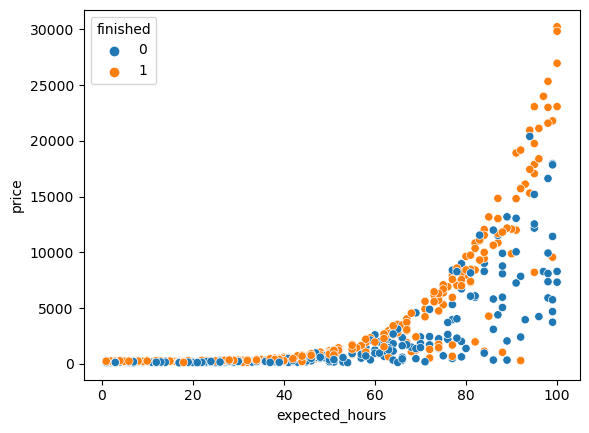

In [20]:
sns.scatterplot(x='expected_hours', y='price', data=test_x, hue=test_y)

In [21]:
# Creating x_min and x_max for future predictions

x_min = test_x.expected_hours.min()
x_max = test_x.expected_hours.max()

y_min = test_x.price.min()
y_max = test_x.price.max()

# Creating points for each pixel on the graphic

pixels = 100

x_axis = np.arange(x_min, x_max, (x_max-x_min) / pixels)
y_axis = np.arange(y_min, y_max, (y_max-y_min) / pixels)

xx, yy = np.meshgrid(x_axis, y_axis)
points = np.c_[xx.ravel(),yy.ravel()]
Z = model.predict(points)
Z = Z.reshape(xx.shape)
Z

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1]], dtype=int64)

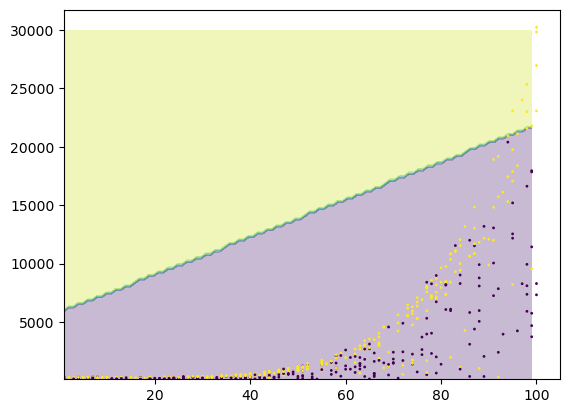

In [22]:
# Checking Decision Boundary

plt.contourf(xx,yy, Z, alpha=0.3)
plt.scatter(test_x.expected_hours, test_x.price, c = test_y, s=1)

In [23]:
# Changing the model to SVC instead of LinearSVC

np.random.seed(SEED)

raw_train_x, raw_test_x, train_y, test_y = train_test_split(x,y, test_size = 0.25, stratify=y)
print(f'Training with: {len(train_x)} elements and Testing with: {len(test_x)} elements')

# Creating standardscaler

scaler = StandardScaler()
scaler.fit(raw_train_x)
train_x = scaler.transform(raw_train_x)
test_x = scaler.transform(raw_test_x)

model = SVC()
model.fit(train_x, train_y)
prediction = model.predict(test_x)

accuracy = accuracy_score(test_y, prediction)

print(f'Accuracy: {accuracy.round(3) * 100} %')
print(train_y.value_counts(), test_y.value_counts())

Training with: 1617 elements and Testing with: 540 elements
Accuracy: 66.9 %
finished
1    850
0    767
Name: count, dtype: int64 finished
1    284
0    256
Name: count, dtype: int64


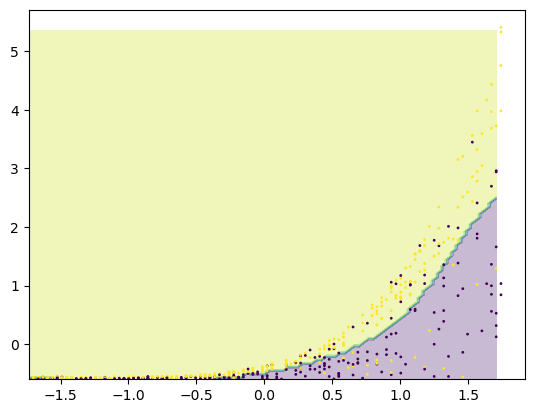

In [24]:
# Checking graphic utilizing changes previously

data_x = test_x[:,0]
data_y = test_x[:,1]

x_min = data_x.min()
x_max = data_x.max()

y_min = data_y.min()
y_max = data_y.max()

# Creating points for each pixel on the graphic

pixels = 100

x_axis = np.arange(x_min, x_max, (x_max-x_min) / pixels)
y_axis = np.arange(y_min, y_max, (y_max-y_min) / pixels)

xx, yy = np.meshgrid(x_axis, y_axis)
points = np.c_[xx.ravel(),yy.ravel()]
Z = model.predict(points)
Z = Z.reshape(xx.shape)

plt.contourf(xx,yy, Z, alpha=0.3)
plt.scatter(data_x, data_y, c = test_y, s=1)

# Fourth Dataset

In [25]:
# Checking dataset

data_3.head()

,Unnamed: 0,mileage_per_year,model_year,price,sold
0,0,21801,2000,30941.02,yes
1,1,7843,1998,40557.96,yes
2,2,7109,2006,89627.50,no
3,3,26823,2015,95276.14,no
4,4,7935,2014,117384.68,yes


In [26]:
# Changing no / yes to 0 / 1 respectively

sold_change = {
    'yes': 1,
    'no': 0
}

data_3.sold = data_3.sold.map(sold_change)
data_3.head()

,Unnamed: 0,mileage_per_year,model_year,price,sold
0,0,21801,2000,30941.02,1
1,1,7843,1998,40557.96,1
2,2,7109,2006,89627.50,0
3,3,26823,2015,95276.14,0
4,4,7935,2014,117384.68,1


In [27]:
# Creating a new column called "car_age", to know what is the age of the car instead of the model_year

data_3['car_age'] = datetime.today().year - data_3.model_year

# Creating a new column called "km_per_year", since we are in brazil we use the KM notification not miles

data_3['km_per_year'] = data_3.mileage_per_year * 1.60934 # Miles to KM

# Drop unnecessary columns

data_3 = data_3.drop(columns = ['Unnamed: 0', 'mileage_per_year', 'model_year'], axis = 1)

data_3.head()

,price,sold,car_age,km_per_year
0,30941.02,1,24,35085.22134
1,40557.96,1,26,12622.05362
2,89627.50,0,18,11440.79806
3,95276.14,0,9,43167.32682
4,117384.68,1,10,12770.11290


In [28]:
# Classify our data

x = data_3[['price','car_age','km_per_year']]
y = data_3['sold']

np.random.seed(SEED)

# First model testing

train_x, test_x, train_y, test_y = train_test_split(x,y, test_size = 0.25, stratify=y)
print(f'Training with: {len(train_x)} elements and Testing with: {len(test_x)} elements')

model = LinearSVC()
model.fit(train_x, train_y)
prediction = model.predict(test_x)

accuracy = accuracy_score(test_y, prediction)

print(f'Accuracy: {accuracy.round(5) * 100} %')

Training with: 7500 elements and Testing with: 2500 elements
Accuracy: 46.88 %


In [29]:
# Using dummy classifier

# Stratified

dummy_stratified = DummyClassifier(strategy='stratified')
dummy_stratified.fit(train_x, train_y)
accuracy = dummy_stratified.score(test_x, test_y) * 100

print(f'Accuracy: {accuracy} %')

# Most Frequent

dummy_most_frequent = DummyClassifier(strategy='most_frequent')
dummy_most_frequent.fit(train_x, train_y)
accuracy = dummy_most_frequent.score(test_x, test_y) * 100

print(f'Accuracy: {accuracy} %')

Accuracy: 52.44 %
Accuracy: 57.99999999999999 %


In [30]:
# Using standard scale

raw_train_x, raw_test_x, train_y, test_y = train_test_split(x,y, test_size = 0.25, stratify=y)
print(f'Training with: {len(train_x)} elements and Testing with: {len(test_x)} elements')

# Creating standardscaler

scaler = StandardScaler()
scaler.fit(raw_train_x)
train_x = scaler.transform(raw_train_x)
test_x = scaler.transform(raw_test_x)

model = SVC()
model.fit(train_x, train_y)
prediction = model.predict(test_x)

accuracy = accuracy_score(test_y, prediction)
print(f'Accuracy: {accuracy * 100} %')

Training with: 7500 elements and Testing with: 2500 elements
Accuracy: 76.44 %


In [31]:
# Using decision tree classifier

raw_train_x, raw_test_x, train_y, test_y = train_test_split(x,y, test_size = 0.25, stratify=y)
print(f'Training with: {len(train_x)} elements and Testing with: {len(test_x)} elements')

model = DecisionTreeClassifier(max_depth=3)
model.fit(raw_train_x, train_y)
prediction = model.predict(raw_test_x)

accuracy = accuracy_score(test_y, prediction)
print(f'Accuracy: {accuracy * 100} %')

Training with: 7500 elements and Testing with: 2500 elements
Accuracy: 79.60000000000001 %


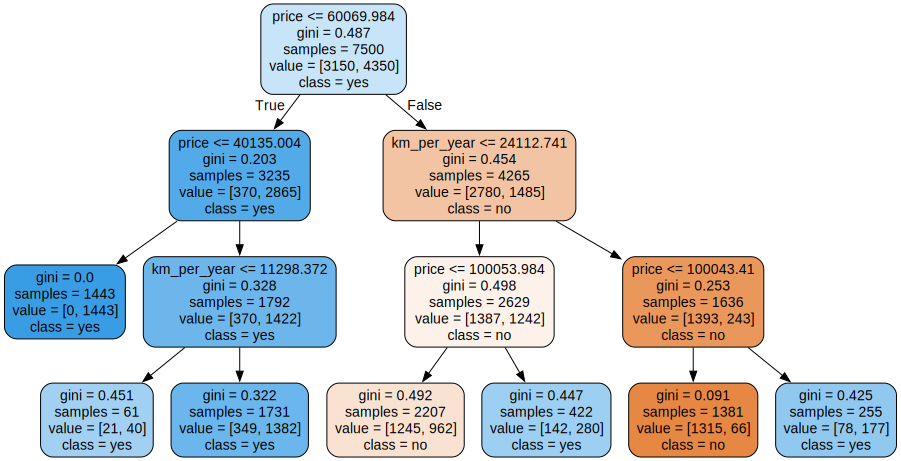

In [32]:
# Creating decision tree graphic

dot_data = export_graphviz(model, out_file=None,
                           feature_names = x.columns,
                           filled=True, rounded=True,
                           class_names=['no','yes']
                          )
graphic = graphviz.Source(dot_data)
graphic